In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv('/Users/aaditnagori/Documents/AllDigital/alldigital-assessment/input/customer_churn_prediction_dataset.csv')

In [5]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,...,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,...,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,...,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,...,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0296-XXXX,Female,1,No,Yes,61,No,Yes,DSL,No,...,Yes,No internet service,No,No,One year,Yes,Electronic check,42.52,2593.72,No
296,0297-XXXX,Female,0,No,No,49,Yes,No phone service,DSL,No internet service,...,Yes,No internet service,Yes,Yes,Month-to-month,Yes,Mailed check,22.31,1093.19,Yes
297,0298-XXXX,Male,0,No,Yes,71,Yes,Yes,DSL,No internet service,...,Yes,Yes,No,Yes,Two year,No,Mailed check,59.57,4229.47,Yes
298,0299-XXXX,Male,1,Yes,Yes,1,Yes,Yes,No,Yes,...,No internet service,No internet service,Yes,Yes,Two year,No,Credit card,31.32,31.32,No


In [8]:
#dropping customerID column
data.drop(['customerID'], axis=1, inplace=True)

In [12]:
#printing columns and their data types
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [20]:
columns_to_encode = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

In [21]:
data[columns_to_encode] = data[columns_to_encode].apply(le.fit_transform)

In [22]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,5,0,2,2,0,2,0,0,0,1,0,1,1,27.43,137.15,1
1,0,0,0,0,42,1,1,0,2,2,0,0,1,1,2,0,2,38.28,1607.76,1
2,0,0,0,0,61,1,1,2,0,2,0,2,2,0,1,0,0,106.44,6492.84,1
3,0,1,0,1,22,1,0,2,1,1,2,0,1,2,0,0,2,92.49,2034.78,0
4,0,1,1,1,21,0,0,0,0,0,1,0,0,1,1,0,0,19.63,412.23,1


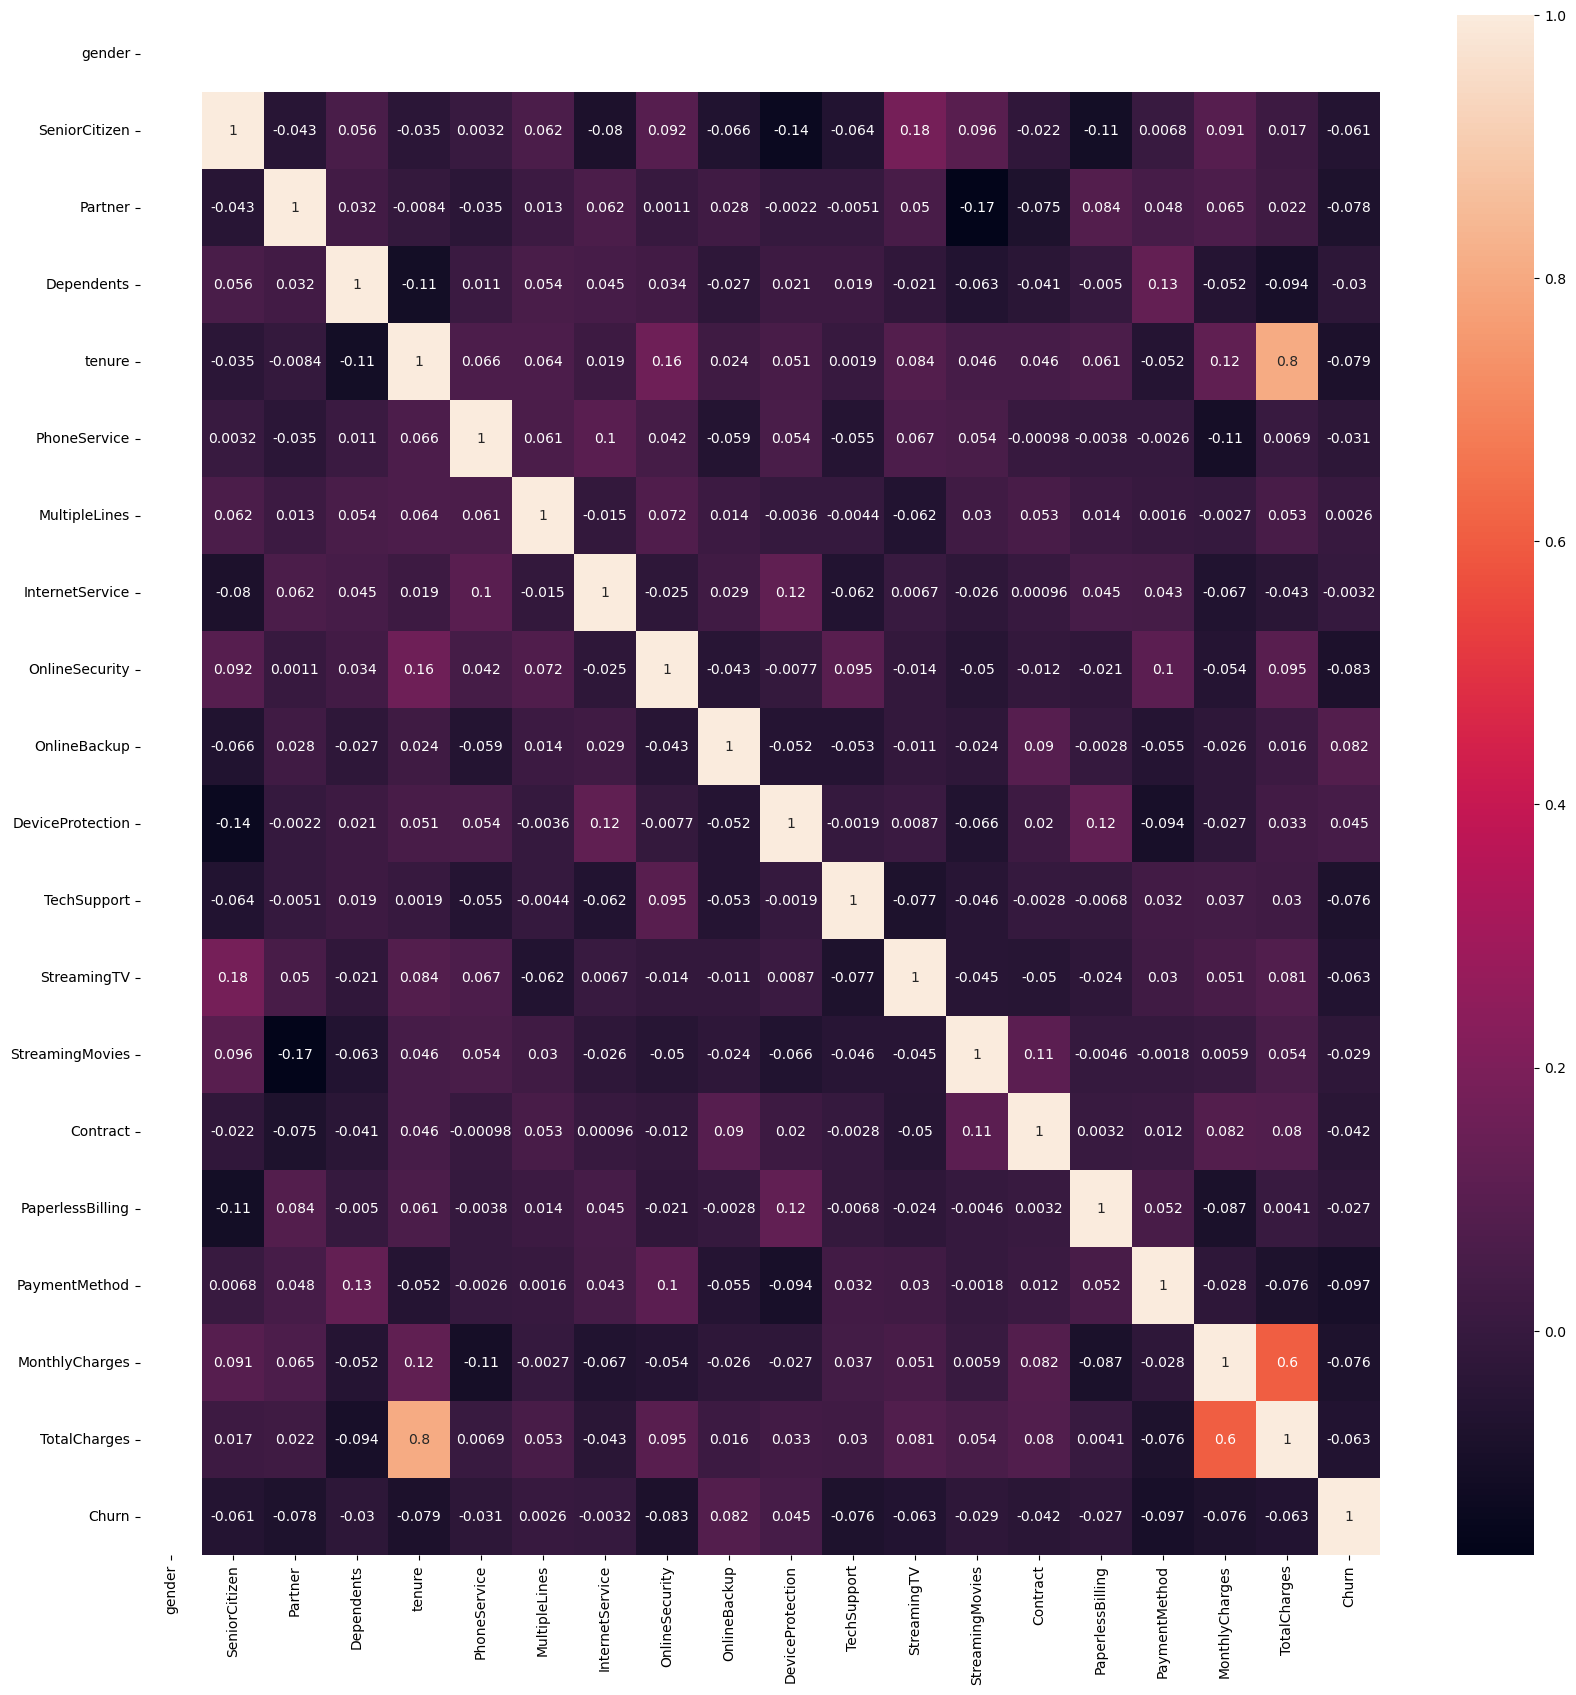

In [24]:
#using seaborn to plot the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [31]:
#using SelectKBest to select the best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.drop('Churn', axis=1)
y = data['Churn']

best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X,y)
X_new = fit.transform(X)


mask = fit.get_support()
new_features1 = X.columns[mask]

new_features1


Index(['SeniorCitizen', 'Partner', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'StreamingTV', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [32]:
#using RFECV to select the best features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = data.drop('Churn', axis=1)
y = data['Churn']

model = LinearRegression()
rfecv = RFE(estimator=model, n_features_to_select=10, step=1)
fit = rfecv.fit(X,y)
X_new = fit.transform(X)

mask = fit.support_
new_features2 = X.columns[mask]

new_features2

Index(['SeniorCitizen', 'Partner', 'PhoneService', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'StreamingTV', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [33]:
#using Lasso to select the best features
from sklearn.linear_model import Lasso

X = data.drop('Churn', axis=1)
y = data['Churn']

model = Lasso(alpha=0.01)
model.fit(X,y)
X_new = model.coef_

mask = X_new != 0
new_features3 = X.columns[mask]

new_features3


Index(['SeniorCitizen', 'Partner', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [35]:
#creating set of best features and graphing with target variable
best_features = set(new_features1) | set(new_features2) | set(new_features3)
best_features = list(best_features)

best_features




['tenure',
 'Contract',
 'PaymentMethod',
 'PaperlessBilling',
 'Partner',
 'TotalCharges',
 'SeniorCitizen',
 'OnlineSecurity',
 'OnlineBackup',
 'StreamingMovies',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'PhoneService',
 'MonthlyCharges']

In [42]:
#create pipeline to try the different sets of new features along with cumulative best features for models: Logistic Regression, Random Forest, and Gradient Boosting
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

X1 = data[new_features1]
X2 = data[new_features2]
X3 = data[new_features3]
X4 = data[best_features]
y = data['Churn']




0.4666666666666667